# **What are Ensemble Methods?**

The ensemble methods, also known as committee-based learning or learning multiple classifier systems train multiple hypotheses to solve the same problem. One of the most common examples of ensemble modelling is the random forest trees where a number of decision trees are used to predict outcomes.

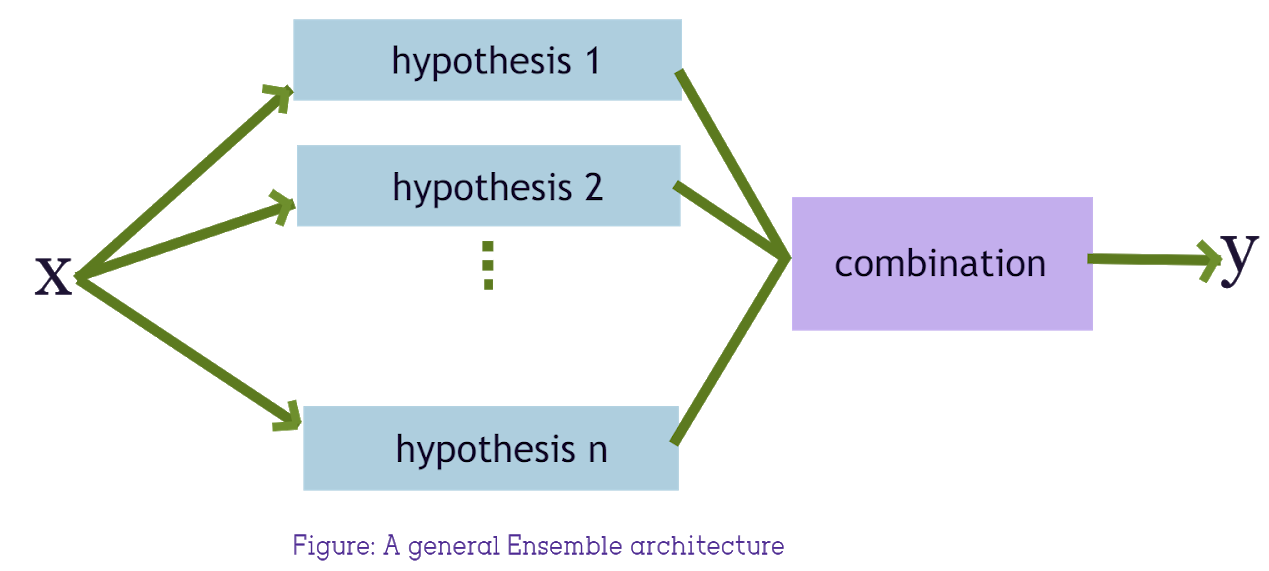

An ensemble contains a number of hypothesis or learners which are usually generated from training data with the help of a base learning algorithm. Most ensemble methods use a single base learning algorithm to produce homogenous base learners or homogenous ensembles and there are also some other methods which use multiple learning algorithms and thus produce heterogenous ensembles. Ensemble methods are well known for their ability to boost weak learners.

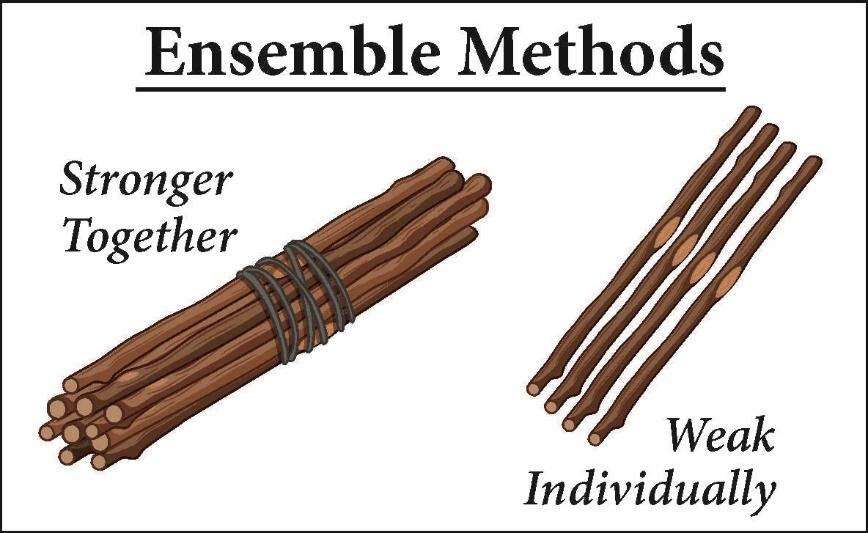

To learn more about it, please refer this article  [Basics of Ensemble Learning](https://analyticsindiamag.com/basics-of-ensemble-learning-in-classification-techniques-explained/).

## **Different Techniques**

### **Bagging**

Bagging or Bootstrap Aggregation is a powerful, effective and simple ensemble method. The method uses multiple versions of a training set by using the bootstrap, i.e. sampling with replacement and t it can be used with any type of model for classification or regression. Bagging is only effective when using unstable (i.e. a small change in the training set can cause a significant change in the model) non-linear models. 

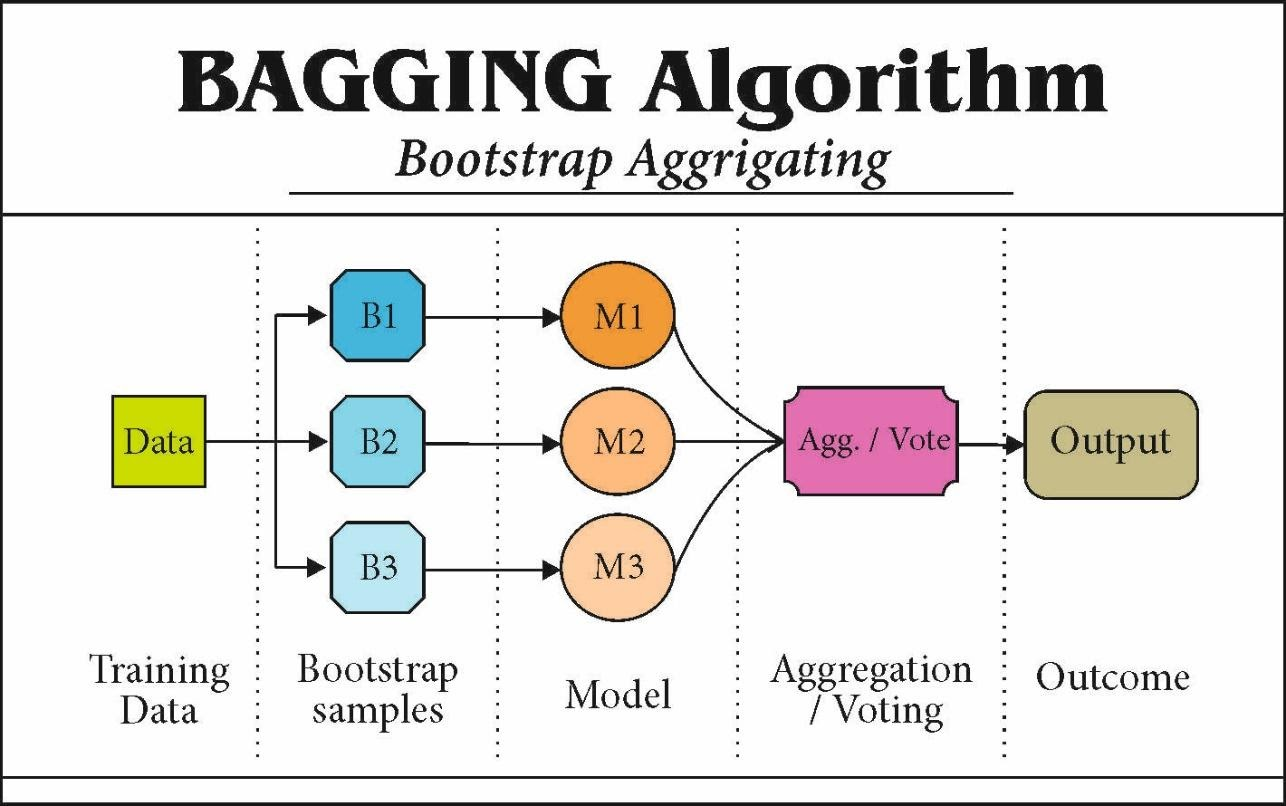

### **Boosting**

Boosting is a meta-algorithm which can be viewed as a model averaging method. It is the most widely used ensemble method and one of the most powerful learning ideas. This method was originally designed for classification but it can also be profitably extended to regression. The original boosting algorithm combined three weak learners to generate a strong learner

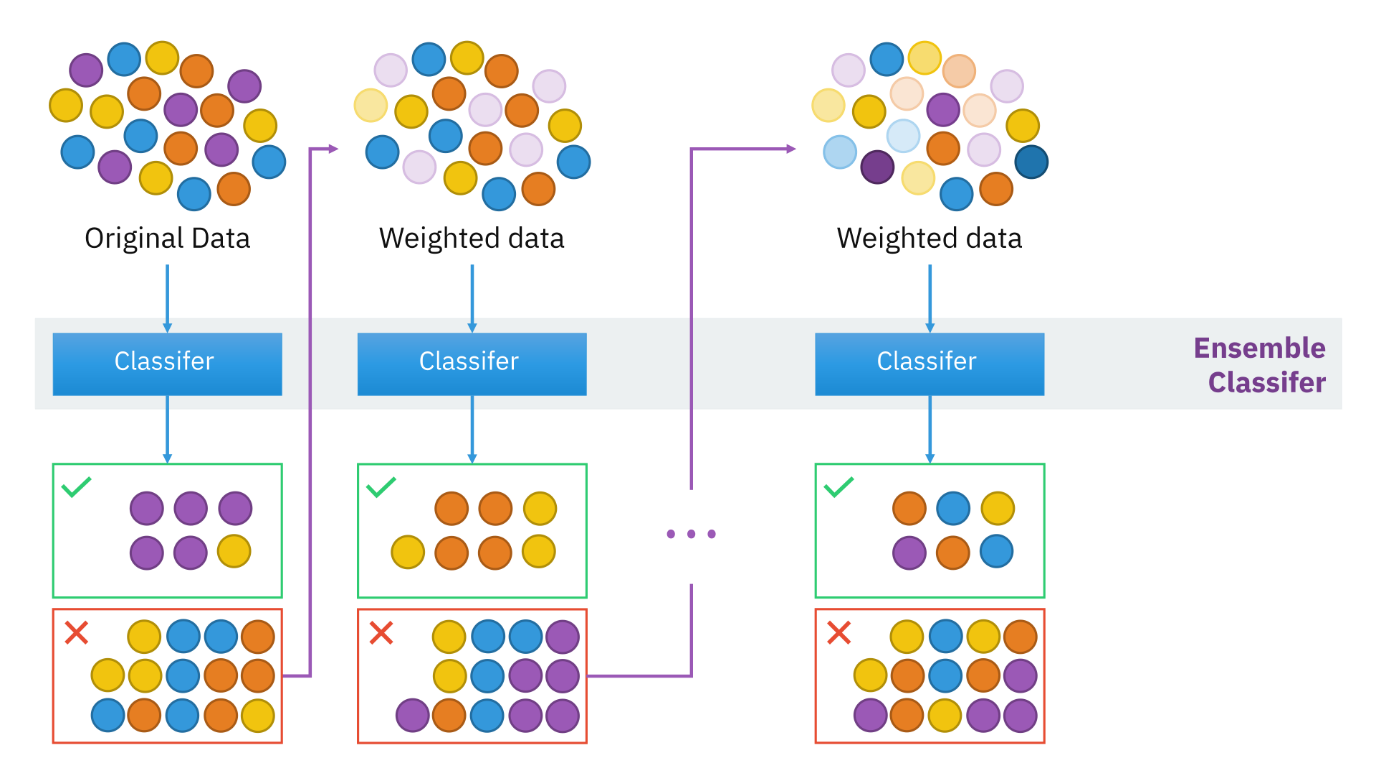

###**Stacking**


Stacking is concerned with combining multiple classifiers generated by using different learning algorithms on a single dataset which consists of pairs of feature vectors and their classifications. This technique consists of basically two phases, in the first phase, a set of base-level classifiers is generated and in the second phase, a meta-level classifier is learned which combines the outputs of the base-level classifiers. 

# **Hybrid Ensemble Model Example**

In this task, the five different types of machine learning models are used as weak learners to build a hybrid ensemble learning model. These models are – Logistic Regression Model, Decision Tree, Support Vector Machine, K-Nearest Neighbor Model, and the Naive Bayes Model. The term hybrid is used here because, in other ensemble models, a homogeneous collection of weak learners is used but in this task, a heterogeneous collection of weak learners is used. 

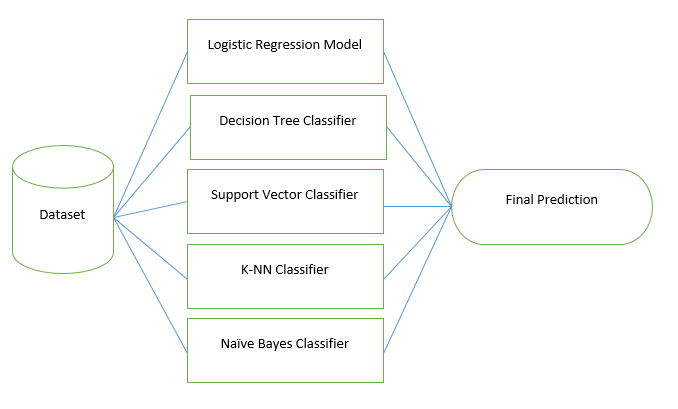

The hybrid ensemble learning model, built using these weak learning models, is applied in the task of classification for the bank’s customer churn modelling. 

## **About the Dataset**

The customer churn modelling dataset is used where the task is to predict the customer’s churn prediction for a bank. This dataset is publically available on [Kaggle](https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers). This dataset comprises the bank’s customers details including the number of products the customer is availing, balance, estimated salary etc. It comprises the record of 10,000 customers with 13 attributes. The target attribute is a binary variable indicating whether the customer has exited from the bank or not. 

## **Performance of Weak Learners**

Now let us have a look at the performance of every individual machine learning model in customer churn prediction. We have trained the five machine learning models including Logistic Regression Model, Decision Tree, Support Vector Machine, K-Nearest Neighbor Model, and the Naive Bayes Model on predicting the exit of customers from the bank. The classification accuracies have been compared using the confusion matrices of each of the models. For more validation, we have performed the 10-fold cross-validations and seen the accuracies of each of the five models. 


Refer to the below python implementation for the above-mentioned purpose.

### **Import the Libraries**

In [ ]:
!python -m pip install pip --upgrade --user -q
!python -m pip install numpy pandas seaborn matplotlib scipy sklearn statsmodels scikit-image --user -q

In [ ]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

In [ ]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### **Read Dataset**

In [ ]:

#Reading the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

### **Encode Categorical Data**

In [ ]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("Geography", OneHotEncoder(), [1])], remainder = 'passthrough')
X = ct.fit_transform(X)
X = X[:, 1:]

### **Splitting the dataset into the Training set and Test set**

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0, stratify = y)


### **Feature Scaling**

In [ ]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### **Defining the machine learning models**

In [ ]:
#Defining the machine learning models
model1 = LogisticRegression()
model2 = DecisionTreeClassifier(max_depth = 2)
model3 = SVC()
model4 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model5 = GaussianNB()

### **Train the Models**

In [ ]:
#Training the machine learning models
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
model5.fit(X_train, y_train)

### Make the Predictions

In [ ]:
#Making the prediction
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)
y_pred4 = model4.predict(X_test)
y_pred5 = model5.predict(X_test)

### **Evaluation of Model**

In [ ]:
#Confusion matrix
cm_LogisticRegression = confusion_matrix(y_test, y_pred1)
cm_DecisionTree = confusion_matrix(y_test, y_pred2)
cm_SupportVectorClass = confusion_matrix(y_test, y_pred3)
cm_KNN = confusion_matrix(y_test, y_pred4)
cm_NaiveBayes = confusion_matrix(y_test, y_pred5)

In [ ]:
#10-fold cross-validation 
kfold = model_selection.KFold(n_splits=10)
result1 = model_selection.cross_val_score(model1, X_train, y_train, cv=kfold)
result2 = model_selection.cross_val_score(model2, X_train, y_train, cv=kfold)
result3 = model_selection.cross_val_score(model3, X_train, y_train, cv=kfold)
result4 = model_selection.cross_val_score(model4, X_train, y_train, cv=kfold)
result5 = model_selection.cross_val_score(model5, X_train, y_train, cv=kfold)

In [ ]:
#Printing the accuracies achieved in cross-validation
print('Accuracy of Logistic Regression Model = ',result1.mean())
print('Accuracy of Decision Tree Model = ',result2.mean())
print('Accuracy of Support Vector Machine = ',result3.mean())
print('Accuracy of k-NN Model = ',result4.mean())
print('Accuracy of Naive Bayes Model = ',result5.mean())
#Output:-

### **Hybrid Ensemble Learning Model**

In this work, we have defined each of the five machine learning models 5 times that results in a combination of a total of 25 weak learners. Then finally, then Max Voting Classifier method is used where the class which has been predicted mostly by the weak learners will be the final class prediction of the ensemble model. 

####**Define the Hybrid Models**

In [ ]:
#Defining Hybrid Ensemble Learning Model
# create the sub-models
estimators = []

In [ ]:
#Defining 5 Logistic Regression Models
model11 = LogisticRegression(penalty = 'l2', random_state = 0)
estimators.append(('logistic1', model11))
model12 = LogisticRegression(penalty = 'l2', random_state = 0)
estimators.append(('logistic2', model12))
model13 = LogisticRegression(penalty = 'l2', random_state = 0)
estimators.append(('logistic3', model13))
model14 = LogisticRegression(penalty = 'l2', random_state = 0)
estimators.append(('logistic4', model14))
model15 = LogisticRegression(penalty = 'l2', random_state = 0)
estimators.append(('logistic5', model15))

In [ ]:
#Defining 5 Decision Tree Classifiers
model16 = DecisionTreeClassifier(max_depth = 3)
estimators.append(('cart1', model16))
model17 = DecisionTreeClassifier(max_depth = 4)
estimators.append(('cart2', model17))
model18 = DecisionTreeClassifier(max_depth = 5)
estimators.append(('cart3', model18))
model19 = DecisionTreeClassifier(max_depth = 2)
estimators.append(('cart4', model19))
model20 = DecisionTreeClassifier(max_depth = 3)
estimators.append(('cart5', model20))

In [ ]:
#Defining 5 Support Vector Classifiers
model21 = SVC(kernel = 'linear')
estimators.append(('svm1', model21))
model22 = SVC(kernel = 'poly')
estimators.append(('svm2', model22))
model23 = SVC(kernel = 'rbf')
estimators.append(('svm3', model23))
model24 = SVC(kernel = 'rbf')
estimators.append(('svm4', model24))
model25 = SVC(kernel = 'linear')
estimators.append(('svm5', model25))

In [ ]:
#Defining 5 K-NN classifiers
model26 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
estimators.append(('knn1', model26))
model27 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
estimators.append(('knn2', model27))
model28 = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
estimators.append(('knn3', model28))
model29 = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 1)
estimators.append(('knn4', model29))
model30 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 1)
estimators.append(('knn5', model30))

In [ ]:
#Defining 5 Naive Bayes classifiers
model31 = GaussianNB()
estimators.append(('nbs1', model31))
model32 = GaussianNB()
estimators.append(('nbs2', model32))
model33 = GaussianNB()
estimators.append(('nbs3', model33))
model34 = GaussianNB()
estimators.append(('nbs4', model34))
model35 = GaussianNB()
estimators.append(('nbs5', model35))

####**Define Ensemble Model**

In [ ]:
# Defining the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

####**Evaluation of Ensemble Method**

In [ ]:

#Confisuin matrix
cm_HybridEnsembler = confusion_matrix(y_test, y_pred)
cm_HybridEnsembler

In [ ]:
#Cross-Validation
# seed = 7
kfold = model_selection.KFold(n_splits=10)
results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=kfold)
print(results.mean())

As we can see the comparisons here, the hybrid ensemble learning model has outperformed all the individual learning model. We can verify this by observing the confusion matrices and cross-validation score of each individual model and the ensemble model. In future, we can make more hybrid ensemble models by adding more varieties of weak learners. We can also have a group of similar models with varying architectures. 

# **Related Articles --**

> * [Basics of Ensemble Learning](https://analyticsindiamag.com/basics-of-ensemble-learning-in-classification-techniques-explained/) 
> * [Bagging V/S Boosting](https://analyticsindiamag.com/guide-to-ensemble-methods-bagging-vs-boosting/)
> * [Guide to Ensemble Learning](https://analyticsindiamag.com/a-hands-on-guide-to-hybrid-ensemble-learning-models-with-python-code/)
> * [Ensemble Methods](https://analyticsindiamag.com/primer-ensemble-learning-bagging-boosting/)